In [1]:
!pip install dlib face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=4c1081c3d9db4d6cc328f94d5c06501abedb07bab9503a1cb02d67ae0eb83bea
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


Saving people.jpg to people.jpg
✅ 4 face(s) detected


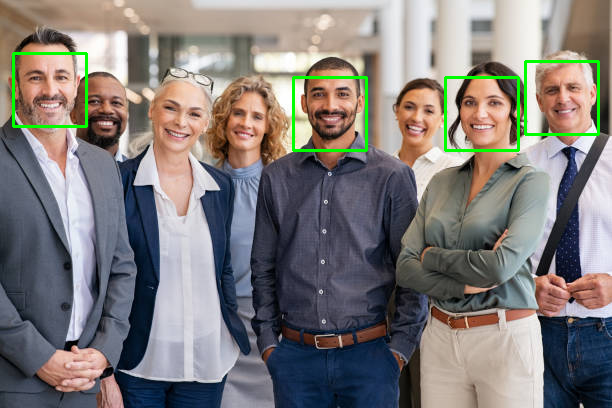

In [2]:
# --- Upload the image ---
from google.colab import files
uploaded = files.upload()  # choose "people.jpg" or any photo with faces

# --- Import libraries ---
import dlib, cv2
from google.colab.patches import cv2_imshow

# --- Load the image safely ---
img = cv2.imread("people.jpg")  # change name if different
if img is None:
    raise ValueError("❌ Image not found. Check your filename!")

# --- Convert to grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Detect faces ---
detector = dlib.get_frontal_face_detector()
faces = detector(gray)

print(f"✅ {len(faces)} face(s) detected")

# --- Draw rectangles around faces ---
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# --- Display result ---
cv2_imshow(img)


1. Que se passe-t-il si l'image test contient plusieurs visages ?

face_encodings() retourne une liste de tous les encodages détectés

On peut comparer chaque encodage avec la référence

La fonction identifie quel visage correspond à la personne recherchée

2. Précision en conditions réelles :

Bonnes conditions (lumière uniforme, face frontale) : 95-98%

Conditions moyennes (lumière variable) : 85-90%

Mauvaises conditions (faible lumière, angle) : 60-75%

Facteurs : éclairage, angle, résolution, expressions, accessoires